
<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**Street View House Numbers Classification**</center>




## **Table of Contents**

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>   
4. [Data Preprocessing](#section4)<br>
5. [Making Data ready for model](#section5)<br> 
6. [Model Building and Evaluation](#section6)<br>
7. [Conclusion](#section7)<br>

<a name=section1></a>

---
# **1. Problem Statement**

---

- The Street View House Numbers (SVHN) dataset is one of the most popular benchmarks for **object recognition tasks** in academic papers. 

- The images were obtained from house numbers in **Google Street View images**, are hosted by Stanford University .

- However, the original purpose of this dataset is to solve a harder problem: that of recognizing digits and numbers in **natural scene images**.

<br> 
<center><img src="https://production-media.paperswithcode.com/datasets/SVHN-0000000424-c12734ed_mMXUnWD.jpg" width="700px" height="450px"/></center>
<br>  

**Scenario**

- The images are from Google street view , so some maybe blur and **distracted** images
- Now you being a data scientist are given task of **classifying these natural scene images**.


<a name=section2></a>

---
# **2. Importing Libraries**
---

In [ ]:
# Basic import numpy, seaborn, matplotlib 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# importing loadmat for laoding .mat format file
from scipy.io import loadmat

# importing keras
from tensorflow import keras

# importing train test split and labelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

# importing Image data generator for Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

<a name=section3></a>

---
# **3. Loading Data**
---

In [ ]:
# Set random state
np.random.seed(20)

# Load the data
train_raw = loadmat('/content/train_32x32.mat')
test_raw = loadmat('/content/test_32x32.mat')

In [ ]:
# Load images and labels
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [ ]:
# Check the shape of the data

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


**Observation**
- There are **73257** images in train data and **26032**
- The shape of images is **32x32x3**

<a name=section4></a>
## 4. Data Preprocessing

In [ ]:
# Fix the axes of the images
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


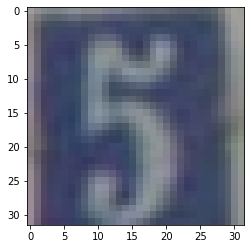

Label:  [5]


In [ ]:
# Plot a random image and its label

plt.imshow(train_images[13529])
plt.show()

print('Label: ', train_labels[13529])

In [ ]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [ ]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [ ]:
# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


**Observation**
- With preprocessing we set axis of images
- Converted images into **float** type and labels into **int**
- Also we **normalised** our images

<a name=section5></a>
## 5. Making data ready for model

In [ ]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

**Observation**
- To encode our labels we used LabelBinarizer which uses **1 vs all** for it.
- Once our data is ready we  spilt them in **train and validation** sets

<a name=section6></a>

---
# **6. Model Building and Evaluation**

---

- In order to get more robust results out of our model, we are going to **augment** the images in the dataset, by randomly rotating them, zooming them in and out, shifting them up and down. 

- It is best that we do not shift them horizontally, since there are also **distracting digits** in the images), shifting their channels and shearing them.

In [ ]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=8,        # rotaion of image
                             zoom_range=[0.95, 1.05], # zooming of image
                             height_shift_range=0.10, # change in height of image
                             shear_range=0.15)        # shear change in image

In [ ]:
# Defining our model

keras.backend.clear_session()

aux_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',             # adding 1st conv layer with same padding, relu activation and shape of input
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),                          # adding batch normalisation
    keras.layers.Conv2D(32, (3, 3), padding='same',             # adding 2nd conv layer with same padding, relu activation 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),                          # using maxpool layer to get on;y important faetures
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

optimizer =keras.optimizers.Adam()                               # using Adam optimizer
aux_model.compile(optimizer=optimizer,                           # using categorical_ crossentopy as our loss fucntion
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])                           # performance metric is accuracy

In [ ]:
aux_model.summary() # here we can see the summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [ ]:
# Fitting order to train our model

history = aux_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=10, validation_data=(X_val, y_val),
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
487/487 [==============================] - 55s 110ms/step - loss: 2.0462 - accuracy: 0.2630 - val_loss: 1.6579 - val_accuracy: 0.4700
Epoch 2/10
487/487 [==============================] - 53s 108ms/step - loss: 1.5682 - accuracy: 0.4470 - val_loss: 1.0402 - val_accuracy: 0.6723
Epoch 3/10
487/487 [==============================] - 52s 108ms/step - loss: 1.0232 - accuracy: 0.6528 - val_loss: 0.4543 - val_accuracy: 0.8667
Epoch 4/10
487/487 [==============================] - 53s 108ms/step - loss: 0.5516 - accuracy: 0.8362 - val_loss: 0.3443 - val_accuracy: 0.8974
Epoch 5/10
487/487 [==============================] - 53s 108ms/step - loss: 0.4285 - accuracy: 0.8762 - val_loss: 0.2692 - val_accuracy: 0.9273
Epoch 6/10
487/487 [==============================] - 53s 108ms/step - loss: 0.3755 - accuracy: 0.8920 - val_loss: 0.2994 - val_accuracy: 0.9155
Epoch 7/10
487/487 [==============================] - 53s 108ms/step - loss: 0.3482 - accuracy: 0.9007 - val_loss: 0.2489 - val_ac

**Observation**
- The train accuracy is **91.5%** with loss = **0.29**
- The validation accuracy is **94%** with loss = **0.22**

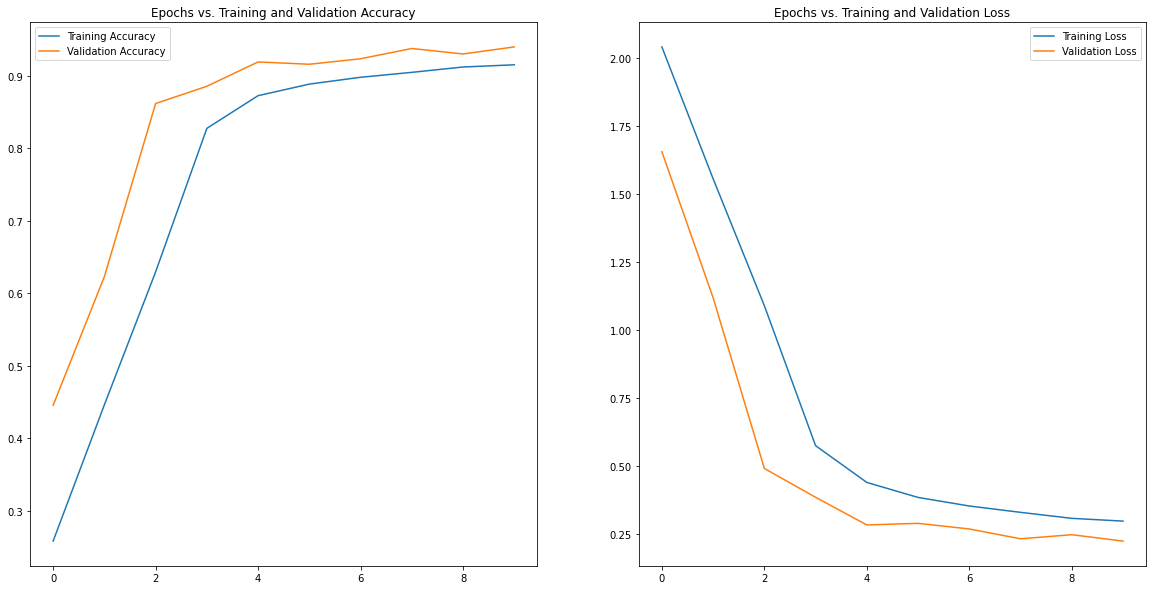

In [ ]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

accuracy = history.history["accuracy"]
loss = history.history["loss"]

val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

**Observation**
- Here we observed that in accuracy plot both train and validation data follow **increasing nature** with inc of no of epochs

- In loss plot we saw both train and val data is **decreasing** with epochs and we also **converging** of the losses which is a good thing

In [ ]:
# Evaluate model on test data
test_loss, test_acc = aux_model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.9441 
Test loss is: 0.2153


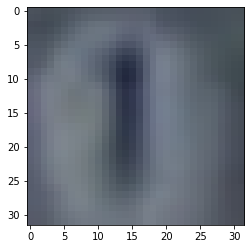

Label:  [1 0 0 0 0 0 0 0 0 0]


In [ ]:
# predicting this image using our model

plt.imshow(test_images[5])
plt.show()

print('Label: ', test_labels[5])

-  deep learning models expect a **batch of images** as input. In this case, we create a batch of one image.

In [ ]:
img_batch= np.expand_dims(test_images[5],axis=0) # creating a batch of one

In [ ]:
predict_x=aux_model.predict(img_batch) # predicting the test image

In [ ]:
classes_x=np.argmax(predict_x,axis=1) # getting index value for class label

In [ ]:
classes_x # class index given by our model 

array([0])

**Observation**
- As we can at **0th** index we have **image of 1** which is rightly predicted by our model
- Our model performance on our test data shows the accuracy of **94.6%**
- The loss is also low with value of **0.20**

<a name=section7></a>

---
# **7. Conclusion**
---

- We have trained a **Convolutional Neural Network** to recognize the digits in the Street View House Numbers dataset . In particular, we have performed some **minimal** preprocessing of the data, we have augmented the data in various ways.
- We trained the  CNN and evaluated it on the test images data. 

- We also saw that as we go deeper in CNN layers **more features** were learnt by our model.


**Application**
- The above model has its application in **Digit recognition from images**.
- It can be further developed to identify number plates of vehicles during crime scenes.
- It Can be used for **auto-filling** of bank details or personal details from physical forms to e-forms.

